In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [3]:
# Only get Data Analyst data from United States
df_DA_US= df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()

#Drop NaN values from 'salary_year_avg' column for visualization
df_DA_US= df_DA_US.dropna(subset=['salary_year_avg'])


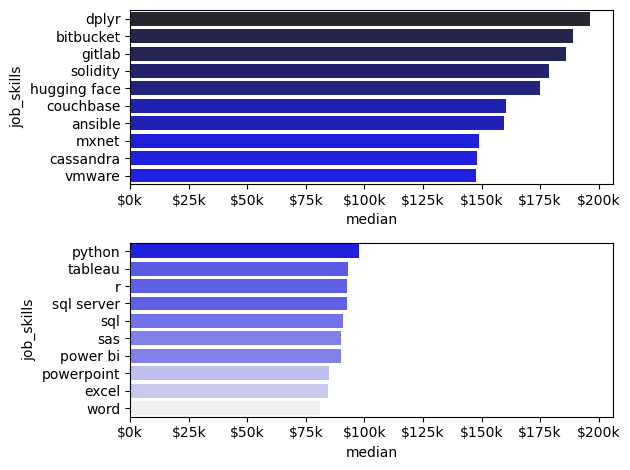

In [15]:
df_DA_US= df_DA_US.explode('job_skills')  
df_DA_US[['salary_year_avg', 'job_skills']]   

df_DA_US_group= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay= df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skill= df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax= plt.subplots(2,1)
#df_DA_top_pay.plot(kind='barh', y='median', ax= ax[0],legend= False) 
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax= ax[0],hue='median', palette='dark:b_r')
#ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[0].legend().remove()

#df_DA_skill[::-1].plot(kind='barh', y='median', ax= ax[1], legend=False)
sns.barplot(data=df_DA_skill, x='median', y=df_DA_skill.index, ax= ax[1],hue='median', palette='light:b')
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[1].legend().remove()

fig.tight_layout()